<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/sentdex_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-09-16 07:59:06--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.68.33, 2600:1402:2000:1bb::e59, 2600:1402:2000:193::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.36.68.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  21.1MB/s    in 42s     

2019-09-16 07:59:48 (18.8 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [6]:
!ls -alh 

total 787M
drwxr-xr-x 1 root root 4.0K Sep 16 07:59 .
drwxr-xr-x 1 root root 4.0K Sep 16 07:53 ..
drwxr-xr-x 1 root root 4.0K Sep  9 16:05 .config
-rw-r--r-- 1 root root 787M Oct 13  2018 kagglecatsanddogs_3367a.zip
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


In [0]:
import os
import zipfile

local_zip = 'kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
!ls /tmp/PetImages

Cat  Dog


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

DATADIR="/tmp/PetImages"

CATEGORIES=["Dog","Cat"]
img_size=150

train_data=[]

def create_training_data():  
    for i in CATEGORIES:
        path=os.path.join(DATADIR,i)
        class_num=CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_path=os.path.join(path,img)
                #convert to gray scale
                img_array=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                
                #resize to be 150x150, keep same ratio as original
                if img_array.shape[0]==img_array.shape[1]:
                  new_array=cv2.resize(img_array,(img_size,img_size))
                  #print('condition1')  
                elif img_array.shape[0]<img_array.shape[1]:
                  center0=int(img_array.shape[0]/2)
                  center1=int(img_array.shape[1]/2)
                  start0=0
                  end0=center0*2
                  start1=center1-center0
                  end1=center1+center0
                  #print('condition2')
                  new_array=img_array[start0:end0,start1:end1]
                  new_array=cv2.resize(img_array,(img_size,img_size)) 
                else:
                  center0=int(img_array.shape[0]/2)
                  center1=int(img_array.shape[1]/2)
                  start1=0
                  end1=center1*2
                  start0=center0-center1
                  end0=center0+center1
                  #print('condition3')
                  new_array=img_array[start0:end0,start1:end1]
                  new_array=cv2.resize(img_array,(img_size,img_size))    
                  
                cv2.imwrite(img_path, new_array) #optional 
                train_data.append([new_array,class_num])
                          
            except Exception as e:
                pass

create_training_data()
print(len(train_data))

24946


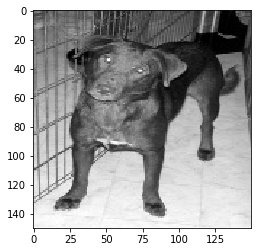

In [11]:
img_path="/tmp/PetImages/Dog/1.jpg"
img=cv2.imread(img_path)
plt.imshow(img)

In [12]:
print(train_data[0])

[array([[243, 243, 240, ..., 241, 241, 243],
       [237, 239, 236, ..., 241, 241, 241],
       [220, 214, 218, ..., 203, 203, 204],
       ...,
       [ 84,  43,  44, ...,  52,  51,  62],
       [ 85,  55,  43, ...,  52,  56,  61],
       [ 76,  60,  59, ...,  70,  70,  64]], dtype=uint8), 0]


In [14]:
import random
random.shuffle(train_data)

for sample in train_data[:10]:
  print(sample[1])

0
1
1
1
0
1
0
0
1
0


In [0]:
x=[]
y=[]

In [0]:
for features,label in train_data:
  x.append(features)
  y.append(label)

In [17]:
print(x[0].dtype)

uint8


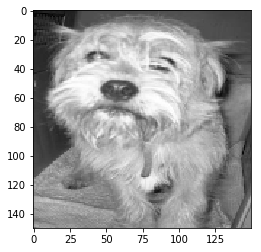

In [18]:
plt.imshow(x[0],cmap="gray")
plt.show()

In [0]:
cvt_x=np.array(x).reshape(-1,img_size,img_size,1)  

In [20]:
print(cvt_x.shape)

(24946, 150, 150, 1)


In [21]:
print(len(y))

24946


In [0]:
import pickle
#save array of x, y with pickle

pickle_out=open("x.pickle","wb")
pickle.dump(cvt_x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [23]:
!ls -alh

total 1.3G
drwxr-xr-x 1 root root 4.0K Sep 16 08:02 .
drwxr-xr-x 1 root root 4.0K Sep 16 07:53 ..
drwxr-xr-x 1 root root 4.0K Sep  9 16:05 .config
-rw-r--r-- 1 root root 787M Oct 13  2018 kagglecatsanddogs_3367a.zip
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data
-rw-r--r-- 1 root root 536M Sep 16 08:02 x.pickle
-rw-r--r-- 1 root root  49K Sep 16 08:02 y.pickle


In [0]:
pickle_in=open("x.pickle","rb")
load_x=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open("y.pickle","rb")
load_y=pickle.load(pickle_in)
pickle_in.close()

In [25]:
print(load_x.shape)

(24946, 150, 150, 1)


In [26]:
print(len(load_y))

24946


In [0]:
from google.colab import files
files.download('y.pickle') 
#better to zip file

In [0]:
files.upload()

In [0]:
cvt_x=cvt_x/255.0

In [28]:
"""
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

"""

"\nimport tensorflow as tf\n\nmodel = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n    # This is the first convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    # The second convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # The third convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # Flatten the results to feed into a DNN\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.5),\n    # 512 neuron hidden layer\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.summary()\n\nmodel.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n\n"

In [0]:
# model.fit(x,y,batch_size=15, epochs=10, validation_split=0.3)

In [30]:
"""
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
"""

"\nmodel2 = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n    # This is the first convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    # The second convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # The third convolution\n    # Flatten the results to feed into a DNN\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.5),\n    # 512 neuron hidden layer\n    tf.keras.layers.Dense(128, activation='relu'),\n    \n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel2.summary()\n\nmodel2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [0]:
# model2.fit(x,y,batch_size=32, epochs=10, validation_split=0.3)

In [35]:
import tensorflow as tf

model3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=cvt_x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
 
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
____

In [36]:
model3.fit(cvt_x,y,batch_size=32, epochs=5, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/5
17462/17462 [==============================] - 44s 3ms/sample - loss: 0.6825 - acc: 0.5515 - val_loss: 0.6635 - val_acc: 0.6005
Epoch 2/5
17462/17462 [==============================] - 41s 2ms/sample - loss: 0.5956 - acc: 0.6837 - val_loss: 0.5413 - val_acc: 0.7251
Epoch 3/5
17462/17462 [==============================] - 41s 2ms/sample - loss: 0.4937 - acc: 0.7582 - val_loss: 0.4813 - val_acc: 0.7730
Epoch 4/5
17462/17462 [==============================] - 41s 2ms/sample - loss: 0.4345 - acc: 0.7928 - val_loss: 0.4650 - val_acc: 0.7861
Epoch 5/5
17462/17462 [==============================] - 41s 2ms/sample - loss: 0.3747 - acc: 0.8305 - val_loss: 0.4524 - val_acc: 0.7897


In [0]:
model3.save('dog_cat.model')

In [38]:
load_model=tf.keras.models.load_model('dog_cat.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
prediction=load_model.predict([cvt_x])

In [40]:
print(prediction.shape)

(24946, 1)


In [44]:
print(cvt_x.shape)

(24946, 150, 150, 1)


In [45]:
print(len(y))

24946


In [46]:
print(prediction)

[[0.10151225]
 [0.9924656 ]
 [0.88550127]
 ...
 [0.60030425]
 [0.2610725 ]
 [0.09860024]]


In [59]:
print(prediction[24943])

[0.60030425]


In [60]:
print(y[24943])

1


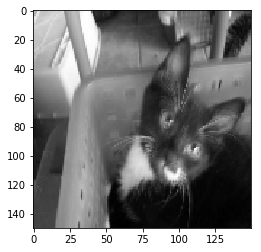

In [61]:
plt.imshow(x[24943],cmap="gray")
plt.show()